# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')


from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler 


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
import pydotplus
from IPython.display import Image  

#### Dataset as 21 features and 2000 entries. The meanings of the features are given below.

* battery_power: Total energy a battery can store in one time measured in mAh
* blue: Has bluetooth or not
* clock_speed: speed at which microprocessor executes instructions
* dual_sim: Has dual sim support or not
* fc: Front Camera mega pixels
* four_g: Has 4G or not
* int_memory: Internal Memory in Gigabytes
* m_dep: Mobile Depth in cm
* mobile_wt: Weight of mobile phone
* n_cores: Number of cores of processor
* pc: Primary Camera mega pixels
* px_height: Pixel Resolution Height
* px_width: Pixel Resolution Width
* ram: Random Access Memory in Mega Byte
* sc_h: Screen Height of mobile in cm
* sc_w: Screen Width of mobile in cm
* talk_time: longest time that a single battery charge will last when you are
* three_g: Has 3G or not
* touch_screen: Has touch screen or not
* wifi: Has wifi or not
* price_range: This is the target variable with value of 0(low medium  cost), 1(above medium cost)

# Read the Data

In [2]:
df =  pd.read_csv('mobile_price.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0


In [3]:
df.shape

(2000, 21)

In [4]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
df.std()

battery_power     439.418206
blue                0.500100
clock_speed         0.816004
dual_sim            0.500035
fc                  4.341444
four_g              0.499662
int_memory         18.145715
m_dep               0.288416
mobile_wt          35.399655
n_cores             2.287837
pc                  6.064315
px_height         443.780811
px_width          432.199447
ram              1084.732044
sc_h                4.213245
sc_w                4.356398
talk_time           5.463955
three_g             0.426273
touch_screen        0.500116
wifi                0.500076
price_range         0.500125
dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
df.price_range.value_counts()

1    1000
0    1000
Name: price_range, dtype: int64

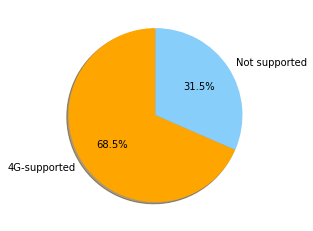

In [117]:
labels = ["4G-supported",'Not supported']
values = df['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['orange', 'lightskyblue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

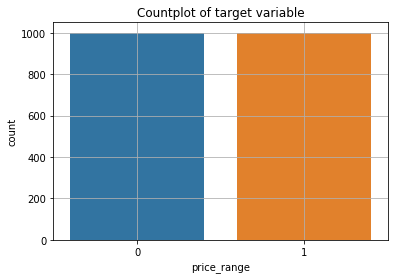

In [8]:
#Ploting  the distribution of the target variable.
sns.countplot(df['price_range'])
plt.title("Countplot of target variable")
plt.grid(True)
plt.show()

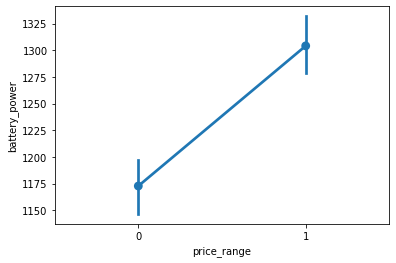

In [9]:
sns.pointplot(x='price_range',y='battery_power',data=df)

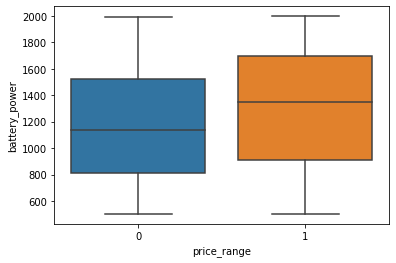

In [10]:
sns.boxplot(x='price_range',y='battery_power',data=df)


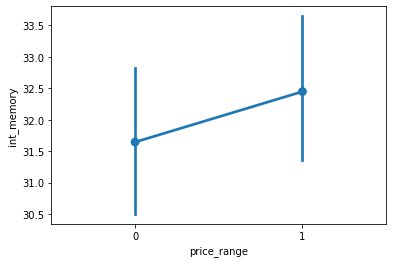

In [11]:
sns.pointplot(x='price_range',y='int_memory',data=df)


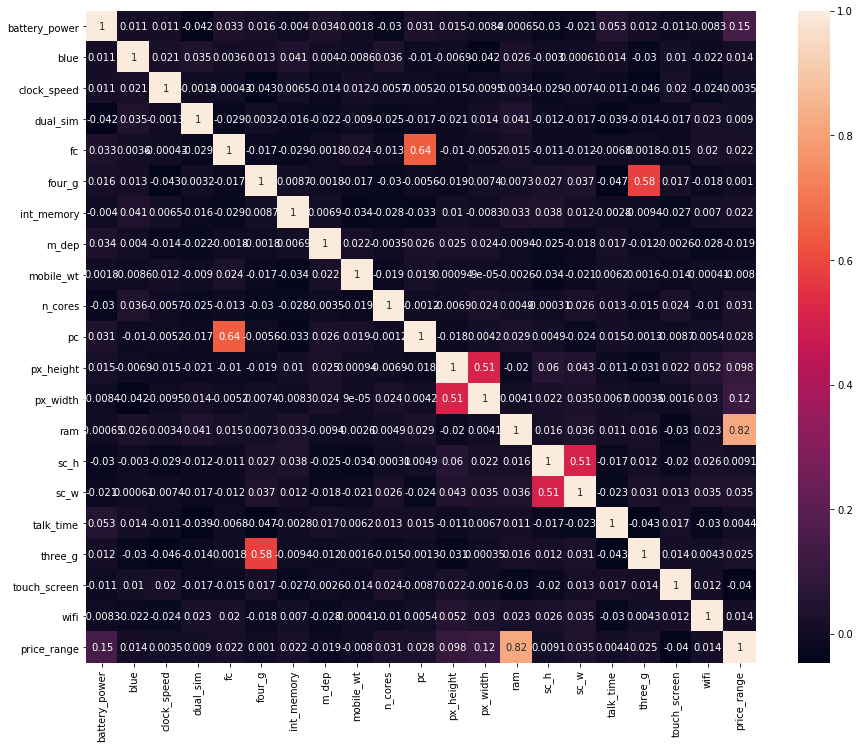

In [12]:
fig = plt.figure(figsize=(15,12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot =True)

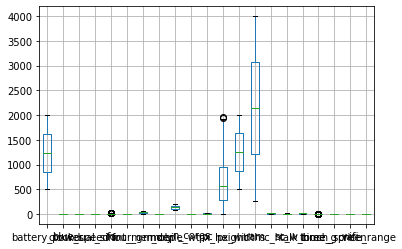

In [13]:
# Ploting a box plot to detect the outlair

df.boxplot()

In [14]:
# Outlair Detaction using IQR method
Q1 = df.drop(['price_range'], axis=1).quantile(0.25)

Q3 = df.drop(['price_range'], axis=1).quantile(0.75)


IQR = Q3 - Q1

print(IQR)

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

battery_power     763.50
blue                1.00
clock_speed         1.50
dual_sim            1.00
fc                  6.00
four_g              1.00
int_memory         32.00
m_dep               0.60
mobile_wt          61.00
n_cores             4.00
pc                 10.00
px_height         664.50
px_width          758.25
ram              1857.00
sc_h                7.00
sc_w                7.00
talk_time          10.00
three_g             0.00
touch_screen        1.00
wifi                1.00
dtype: float64


In [15]:
df.shape

(1506, 21)

In [16]:
df.std()

battery_power     439.152661
blue                0.499972
clock_speed         0.813850
dual_sim            0.500138
fc                  4.215837
four_g              0.464831
int_memory         18.218391
m_dep               0.287849
mobile_wt          35.143590
n_cores             2.276619
pc                  6.059893
px_height         435.280087
px_width          428.973230
ram              1084.554839
sc_h                4.213579
sc_w                4.417835
talk_time           5.433910
three_g             0.000000
touch_screen        0.500130
wifi                0.500138
price_range         0.500122
dtype: float64

### Confusion matrix (heatmap)  roc-auc curve.


In [17]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC curve for Mobile Price ', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)




In [18]:
from matplotlib.colors import ListedColormap
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

# Model creation


#### Standard Scalar for Naive_bayes and KNN.


In [19]:
df_target = df['price_range']
X = df.drop('price_range', axis = 1)

In [20]:
ss = StandardScaler()

num_scaled = ss.fit_transform(X)

In [ ]:

X = pd.DataFrame(X, columns=X.columns)
X.head()

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(num_scaled, df_target, test_size=0.25, random_state=123,stratify=df_target)

print("Training size = " + str(X_train.shape[0]))
print("Testing size = " + str(X_test.shape[0]))

Training size = 1129
Testing size = 377


# Naive_bayes


In [23]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)

y_test_pred1 = gnb.predict(X_test)
y_train_pred1=gnb.predict(X_train)

knn_acc=accuracy_score(y_test_pred1,y_test)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred1,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred1,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred1,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred1,y_test))

Train Set Accuracy:93.09123117803367
Test Set Accuracy:94.42970822281167

Confusion Matrix:
[[177  12]
 [  9 179]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       189
           1       0.94      0.95      0.94       188

    accuracy                           0.94       377
   macro avg       0.94      0.94      0.94       377
weighted avg       0.94      0.94      0.94       377



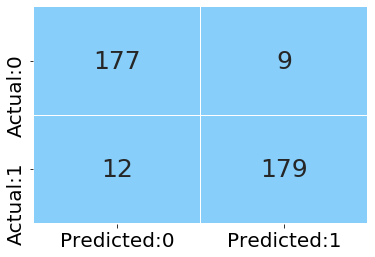

In [24]:
plot_confusion_matrix(gnb)

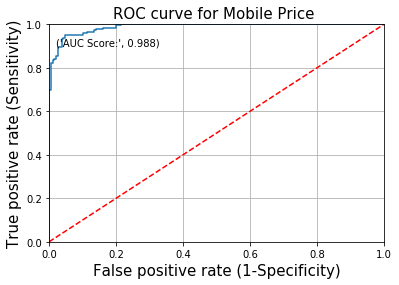

In [25]:
plot_roc(gnb)

In [26]:
gnb = gnb
score=cross_val_score(gnb, X_train, y_train, cv=10)
gnb_score=score.mean()
print("Accuracy after 10 fold cross validation:", gnb_score)

Accuracy after 10 fold cross validation: 0.9273625158027812


# KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=44)

knn.fit(X_train,y_train)

y_test_pred1 = knn.predict(X_test)
y_train_pred1=knn.predict(X_train)

knn_acc=accuracy_score(y_test_pred1,y_test)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred1,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred1,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred1,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred1,y_test))

Train Set Accuracy:90.69973427812224
Test Set Accuracy:90.18567639257294

Confusion Matrix:
[[169  20]
 [ 17 171]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       189
           1       0.90      0.91      0.90       188

    accuracy                           0.90       377
   macro avg       0.90      0.90      0.90       377
weighted avg       0.90      0.90      0.90       377



In [27]:
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
knn_classification = KNeighborsClassifier(n_jobs=-1)
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 3, 
                        scoring = 'accuracy', 
                        n_jobs=-1)
knn_grid.fit(X_train, y_train)
print('Best parameters for KNN Classifier: ', knn_grid)

Best parameters for KNN Classifier:  GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'metric': ['hamming', 'euclidean', 'manhattan',
                                    'Chebyshev'],
                         'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])},
             scoring='accuracy')


In [28]:
knn_grid.best_params_


{'metric': 'manhattan', 'n_neighbors': 23}

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=23,metric= 'manhattan')

knn.fit(X_train,y_train)

y_test_pred1 = knn.predict(X_test)
y_train_pred1=knn.predict(X_train)

knn_acc=accuracy_score(y_test_pred1,y_test)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred1,y_train)*100))

print("Test Set Accuracy:"+str(accuracy_score(y_test_pred1,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred1,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred1,y_test))

Train Set Accuracy:91.05403011514615
Test Set Accuracy:91.77718832891246

Confusion Matrix:
[[174  19]
 [ 12 172]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       193
           1       0.90      0.93      0.92       184

    accuracy                           0.92       377
   macro avg       0.92      0.92      0.92       377
weighted avg       0.92      0.92      0.92       377



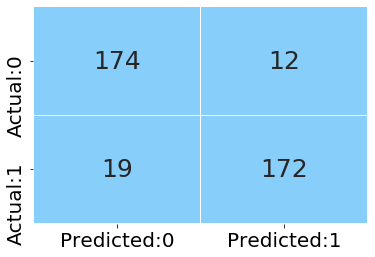

In [29]:
plot_confusion_matrix(knn)

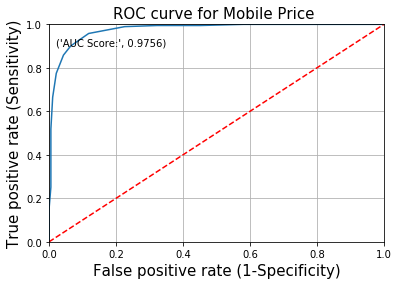

In [30]:
plot_roc(knn)

In [31]:
knn = knn
score=cross_val_score(knn, X_train, y_train, cv=10)
knn_score=score.mean()
print("Accuracy after 10 fold cross validation:", knn_score)

Accuracy after 10 fold cross validation: 0.8857537926675094


# LOGISTIC REGRESSION


In [32]:
import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


lr = LogisticRegression(penalty='l2',C=0.1)
lr.fit(X_train,y_train)
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

lr_acc=accuracy_score(y_test_pred,y_test)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))

Train Set Accuracy:98.93711248892826
Test Set Accuracy:97.87798408488064

Confusion Matrix:
[[181   3]
 [  5 188]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       184
           1       0.98      0.97      0.98       193

    accuracy                           0.98       377
   macro avg       0.98      0.98      0.98       377
weighted avg       0.98      0.98      0.98       377



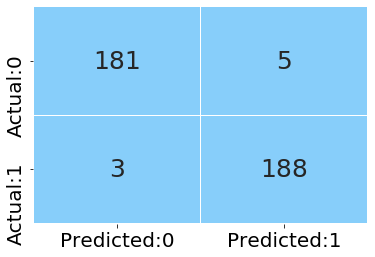

In [33]:
plot_confusion_matrix(lr)

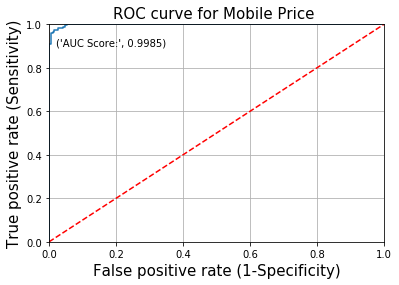

In [34]:
plot_roc(lr)

## Tuning Logestic parameters

In [37]:
tuned_paramaters =  {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }

lr_grid = GridSearchCV(estimator = lr, 
                        param_grid = tuned_paramaters, 
                        cv = 3, 
                        scoring = 'accuracy', 
                        n_jobs=-1)
lr_grid.fit(X_train, y_train)
print('Best parameters for Logestic Regression Classifier: ', lr_grid.best_params_)

Best parameters for Logestic Regression Classifier:  {'C': 1.623776739188721, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}


# Post Logestic Regression Tuning

In [35]:
lr = LogisticRegression(penalty='l1',C=1.623776739188721,max_iter=1000,solver= 'saga')
lr.fit(X_train,y_train)
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

lr_acc=accuracy_score(y_test_pred,y_test)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))

Train Set Accuracy:99.82285208148805
Test Set Accuracy:97.87798408488064

Confusion Matrix:
[[180   2]
 [  6 189]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       182
           1       0.99      0.97      0.98       195

    accuracy                           0.98       377
   macro avg       0.98      0.98      0.98       377
weighted avg       0.98      0.98      0.98       377



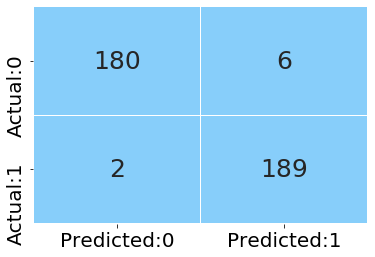

In [36]:
plot_confusion_matrix(lr)

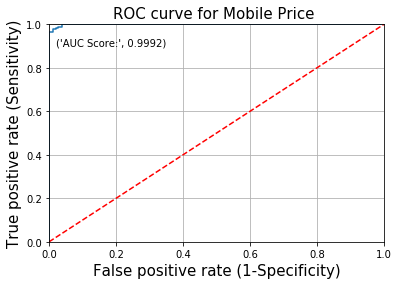

In [37]:
plot_roc(lr)

In [40]:
lr = LogisticRegression(penalty='l1',C=1.623776739188721,max_iter=1000,solver= 'saga')
score=cross_val_score(lr, X_train, y_train, cv=10)
lr_score=score.mean()
print("Accuracy after 10 fold cross validation:", lr_score)

Accuracy after 10 fold cross validation: 0.9920353982300885


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df_target, test_size=0.25, random_state=123,stratify=df_target)

print("Training size = " + str(X_train.shape[0]))
print("Testing size = " + str(X_test.shape[0]))

Training size = 1129
Testing size = 377


# DECISION TREE


In [71]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_test_pred3 = dtc.predict(X_test)
y_train_pred3=dtc.predict(X_train)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred3,y_train)*100))

print("Test Set Accuracy:"+str(accuracy_score(y_test_pred3,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred3,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred3,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:93.63395225464191

Confusion Matrix:
[[176  14]
 [ 10 177]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       190
           1       0.93      0.95      0.94       187

    accuracy                           0.94       377
   macro avg       0.94      0.94      0.94       377
weighted avg       0.94      0.94      0.94       377



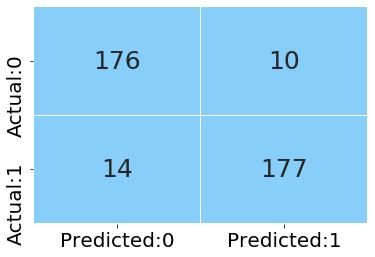

In [72]:
plot_confusion_matrix(dtc)

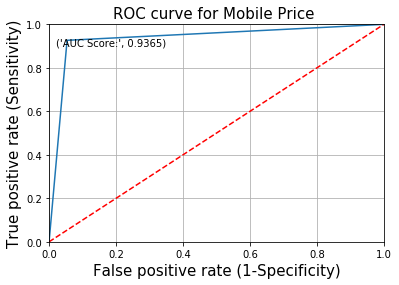

In [73]:
plot_roc(dtc)

In [44]:
import pydotplus
from IPython.display import Image
import graphviz

In [45]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

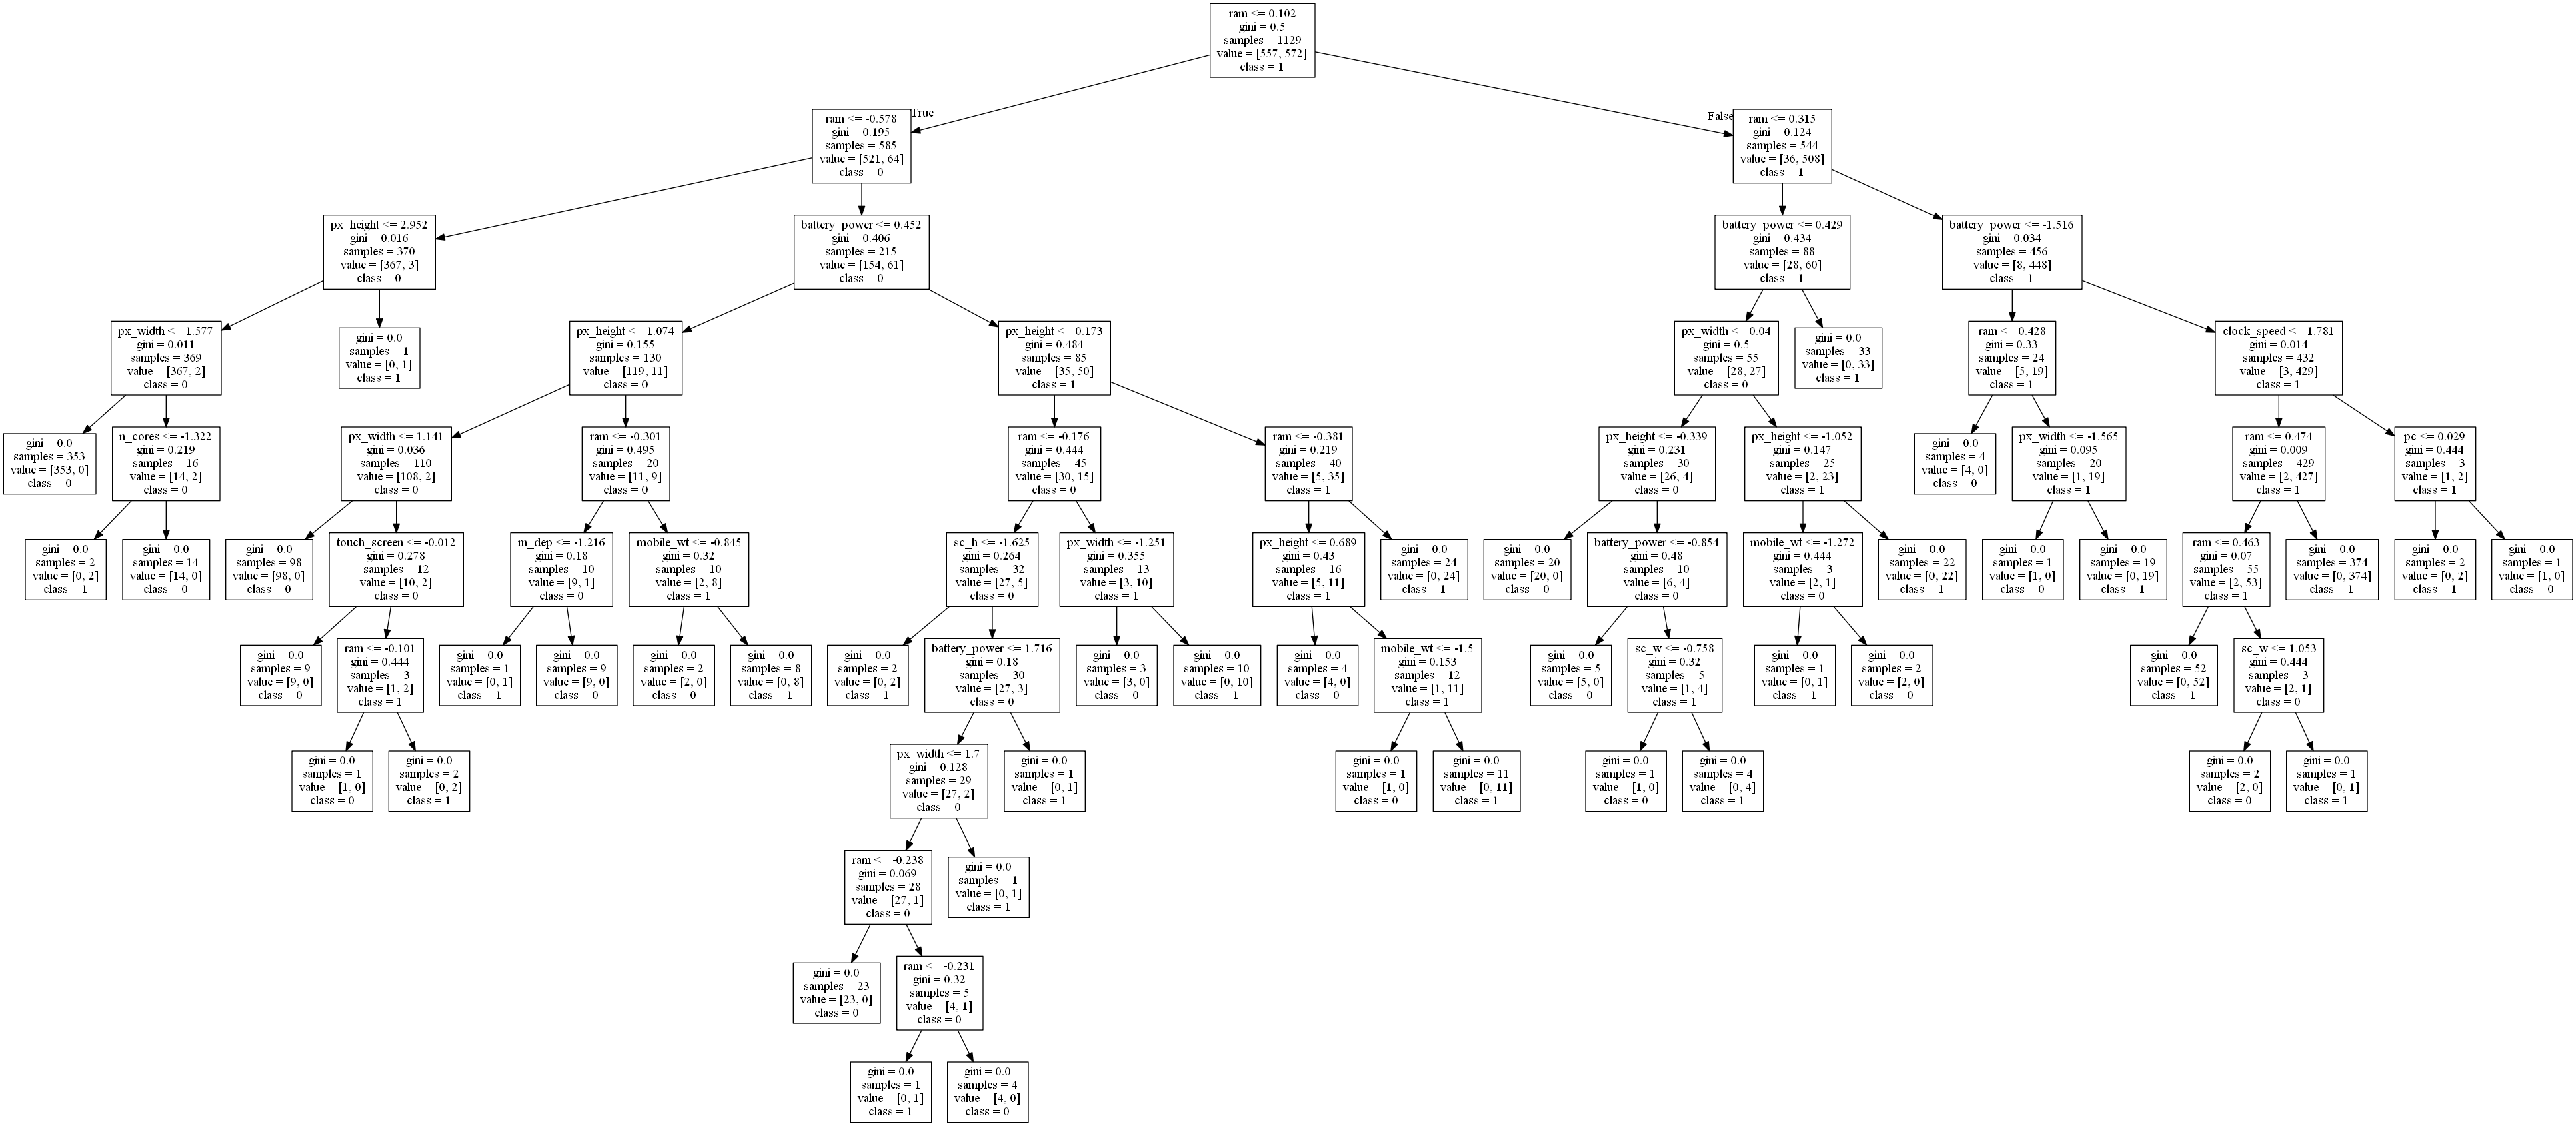

In [70]:
labels = X_train.columns


dot_data = tree.export_graphviz(dtc, feature_names = labels, class_names = ["0","1"])  

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

# Decision Treee Tuning 

In [47]:
from sklearn.model_selection import RandomizedSearchCV

In [78]:
tuned_paramaters = {'max_depth' : (3,5,7,9,10,15,20,25)
              , 'criterion' : ('gini', 'entropy')
              , 'max_features' : ('auto', 'sqrt', 'log2')
              , 'min_samples_split' : (2,4,6)
             }

In [79]:
DT_grid  = GridSearchCV(estimator=dtc, param_grid = tuned_paramaters,  scoring = 'accuracy',cv = 5, verbose = True)
DT_grid.fit(X_train,y_train)
print(DT_grid.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
{'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 6}


In [78]:
dtc = DecisionTreeClassifier(criterion='entropy',
                       max_depth=20, max_features='sqrt',  min_samples_split=4)
dtc.fit(X_train, y_train)

y_test_pred3 = dtc.predict(X_test)
y_train_pred3=dtc.predict(X_train)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred3,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred3,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred3,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred3,y_test))

Train Set Accuracy:98.67139061116032
Test Set Accuracy:80.63660477453581

Confusion Matrix:
[[155  42]
 [ 31 149]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       197
           1       0.78      0.83      0.80       180

    accuracy                           0.81       377
   macro avg       0.81      0.81      0.81       377
weighted avg       0.81      0.81      0.81       377



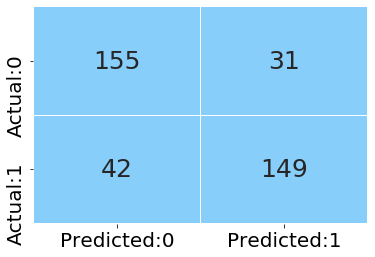

In [79]:
plot_confusion_matrix(dtc)

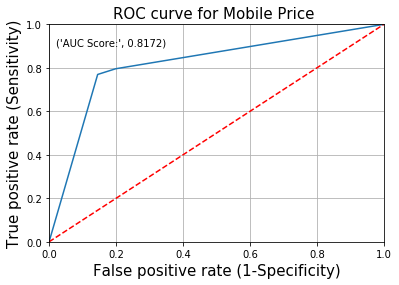

In [80]:
plot_roc(dtc)

In [81]:
dtc = DecisionTreeClassifier(criterion='entropy',
                       max_depth=20, max_features='sqrt',  min_samples_split=4)
score=cross_val_score(dtc, X_train, y_train, cv=10)
dtc_score=score.mean()
print("Accuracy after 10 fold cross validation:", dtc_score)

Accuracy after 10 fold cross validation: 0.8317556890012641


# Random Forest


In [82]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_test_pred3 = rf.predict(X_test)
y_train_pred3=rf.predict(X_train)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred3,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred3,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred3,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred3,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:95.22546419098144

Confusion Matrix:
[[181  13]
 [  5 178]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       194
           1       0.93      0.97      0.95       183

    accuracy                           0.95       377
   macro avg       0.95      0.95      0.95       377
weighted avg       0.95      0.95      0.95       377



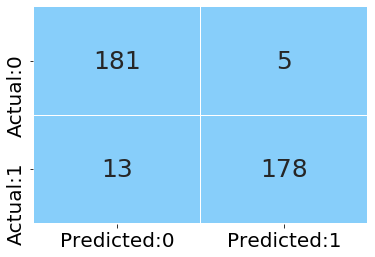

In [83]:
plot_confusion_matrix(rf)

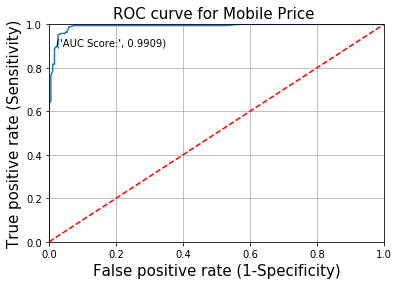

In [84]:
plot_roc(rf)

In [85]:
rf = RandomForestClassifier(random_state = 1)
rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

cm=confusion_matrix(y_test,y_pred)

precision=cm[1,1]/(cm[1,1]+cm[0,1])
print(precision)
sensitivity=cm[1,1]/(cm[1,1]+cm[1,0])

print(sensitivity)

0.9672131147540983
0.9267015706806283


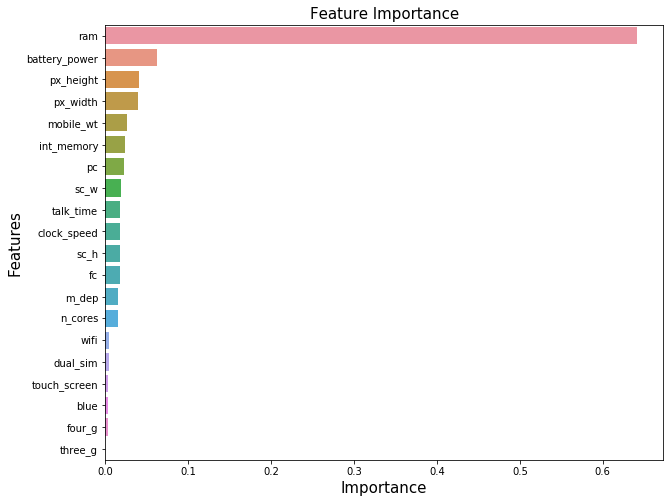

In [86]:
important_features = pd.DataFrame({'Features': x_train.columns, 
                                   'Importance': rf_model.feature_importances_})


important_features = important_features.sort_values('Importance', ascending = False)

plt.figure(figsize=(10,8))
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

# Parameter Tunning 

In [87]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [88]:
parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [89]:
DT_grid  = GridSearchCV(estimator=rf, param_grid = parameters,  scoring = 'accuracy',cv = 5, verbose = 0)
DT_grid.fit(X_train,y_train)
print(DT_grid.best_params_)

{'bootstrap': False, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 33}


In [87]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(bootstrap= False, max_depth= 4, max_features='auto', min_samples_leaf= 2, min_samples_split= 2, n_estimators= 33)
rf.fit(X_train, y_train)

y_test_pred3 = rf.predict(X_test)
y_train_pred3=rf.predict(X_train)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred3,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred3,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred3,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred3,y_test))

Train Set Accuracy:95.65987599645705
Test Set Accuracy:94.16445623342176

Confusion Matrix:
[[181  17]
 [  5 174]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       198
           1       0.91      0.97      0.94       179

    accuracy                           0.94       377
   macro avg       0.94      0.94      0.94       377
weighted avg       0.94      0.94      0.94       377



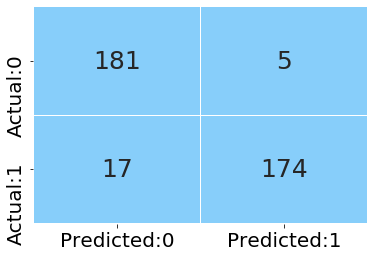

In [88]:
plot_confusion_matrix(rf)

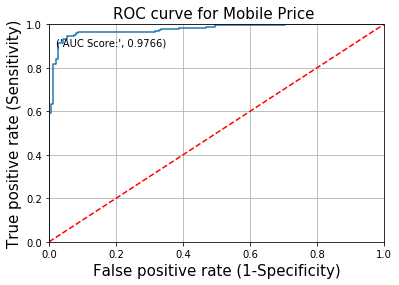

In [89]:
plot_roc(rf)

In [91]:
rf = RandomForestClassifier(bootstrap= False, max_depth= 4, max_features='auto', min_samples_leaf= 2, min_samples_split= 2, n_estimators= 33)

score=cross_val_score(rf, X_train, y_train, cv=10)
rf_score=score.mean()
print("Accuracy after 10 fold cross validation:", rf_score)

Accuracy after 10 fold cross validation: 0.9282158659924147


In [93]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# AdaBoostClassifier

In [94]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)
ada_model.fit(X_train, y_train)
y_test_pred4 = ada_model.predict(X_test)
y_train_pred4=ada_model.predict(X_train)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred4,y_train)*100))

print("Test Set Accuracy:"+str(accuracy_score(y_test_pred4,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred4,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred4,y_test))


Train Set Accuracy:99.91142604074402
Test Set Accuracy:97.87798408488064

Confusion Matrix:
[[184   6]
 [  2 185]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       190
           1       0.97      0.99      0.98       187

    accuracy                           0.98       377
   macro avg       0.98      0.98      0.98       377
weighted avg       0.98      0.98      0.98       377



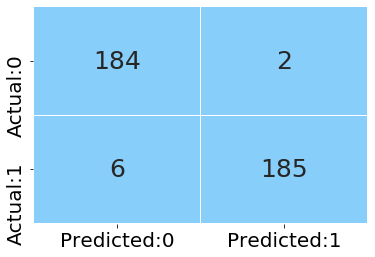

In [95]:
plot_confusion_matrix(ada_model)

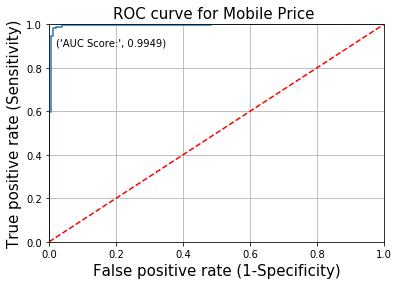

In [96]:
plot_roc(ada_model)

###  Adaboost Tuning 

In [100]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                     'n_estimators':range(1,51)}
ada_model =AdaBoostClassifier()
ada_grid = GridSearchCV(estimator = ada_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')
ada_grid.fit(X_train, y_train)
print('Best parameters for ADABoost classifier: ', ada_grid.best_params_, '\n')

Best parameters for ADABoost classifier:  {'learning_rate': 1.0, 'n_estimators': 49} 



In [98]:
ada_model = AdaBoostClassifier(n_estimators = 49, random_state = 10,learning_rate= 1.0)
ada_model.fit(X_train, y_train)
y_test_pred4 = ada_model.predict(X_test)
y_train_pred4=ada_model.predict(X_train)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred4,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred4,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred4,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred4,y_test))


Train Set Accuracy:99.91142604074402
Test Set Accuracy:98.40848806366049

Confusion Matrix:
[[184   4]
 [  2 187]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       188
           1       0.98      0.99      0.98       189

    accuracy                           0.98       377
   macro avg       0.98      0.98      0.98       377
weighted avg       0.98      0.98      0.98       377



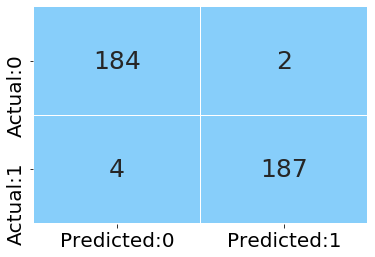

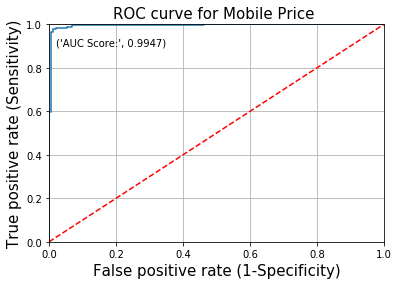

In [99]:
plot_confusion_matrix(ada_model)

plot_roc(ada_model)

In [101]:
ada_model = AdaBoostClassifier(n_estimators = 49, random_state = 10,learning_rate= 1.0)
score1=cross_val_score(ada_model, X_train, y_train, cv=10)
score1=score1.mean()
print("Accuracy after 10 fold cross validation:", score1)

Accuracy after 10 fold cross validation: 0.9698878002528446


# GradientBoostingClassifier

In [102]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)
gboost_model.fit(X_train, y_train)
y_test_pred5 = gboost_model.predict(X_test)
y_train_pred5=gboost_model.predict(X_train)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred5,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred5,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred5,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred5,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:94.9602122015915

Confusion Matrix:
[[179  12]
 [  7 179]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       191
           1       0.94      0.96      0.95       186

    accuracy                           0.95       377
   macro avg       0.95      0.95      0.95       377
weighted avg       0.95      0.95      0.95       377



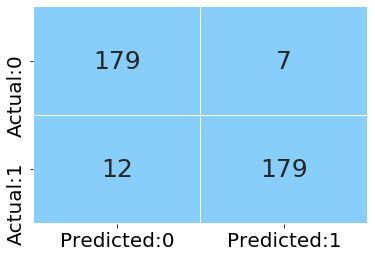

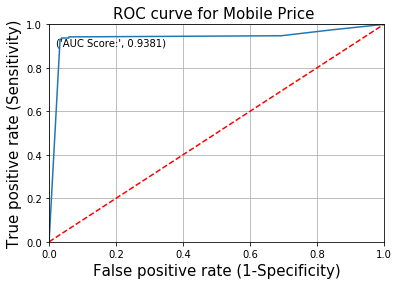

In [103]:


plot_confusion_matrix(gboost_model)
plot_roc(gboost_model)

### GrdientBoosting Tuning 

In [108]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                     'n_estimators':range(1,51),
                    'max_depth':range(1,11)}
gbc_model =GradientBoostingClassifier()
gbc_grid = GridSearchCV(estimator = gboost_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')
gbc_grid.fit(X_train, y_train)
print('Best parameters for GradientBoost classifier: ', gbc_grid.best_params_, '\n')

Best parameters for GradientBoost classifier:  {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 43} 



In [104]:
gboost_model = GradientBoostingClassifier(n_estimators = 43, max_depth = 2, random_state = 10,learning_rate= 0.5)
gboost_model.fit(X_train, y_train)
y_test_pred5 = gboost_model.predict(X_test)
y_train_pred5=gboost_model.predict(X_train)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred5,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred5,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred5,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred5,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:97.08222811671088

Confusion Matrix:
[[182   7]
 [  4 184]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       189
           1       0.96      0.98      0.97       188

    accuracy                           0.97       377
   macro avg       0.97      0.97      0.97       377
weighted avg       0.97      0.97      0.97       377



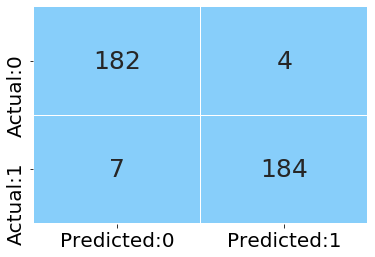

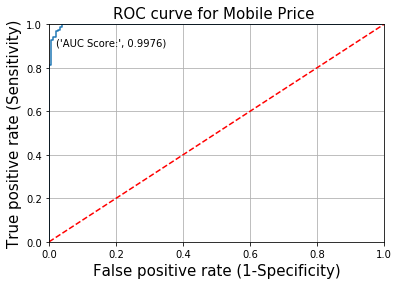

In [105]:
plot_confusion_matrix(gboost_model)

plot_roc(gboost_model)

In [106]:
gboost_model = GradientBoostingClassifier()
score2=cross_val_score(gboost_model, X_train, y_train, cv=10)
score2=score2.mean()
print("Accuracy after 10 fold cross validation:", score2)

Accuracy after 10 fold cross validation: 0.9672329329962073


# XGBoost

In [108]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1,verbosity=0)
xgb_model.fit(X_train, y_train)
y_test_pred6 = xgb_model.predict(X_test)
y_train_pred6=xgb_model.predict(X_train)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred6,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred6,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred6,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred6,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:97.34748010610079

Confusion Matrix:
[[183   7]
 [  3 184]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       190
           1       0.96      0.98      0.97       187

    accuracy                           0.97       377
   macro avg       0.97      0.97      0.97       377
weighted avg       0.97      0.97      0.97       377



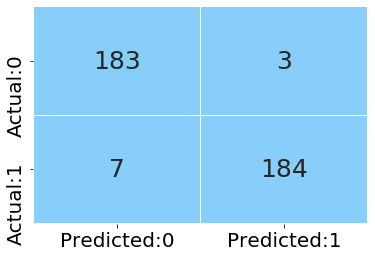

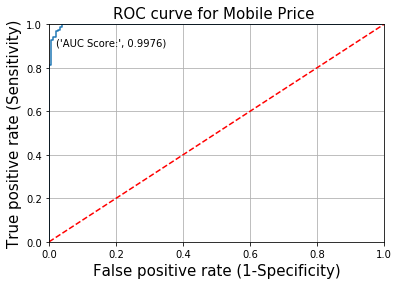

In [113]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1,verbosity=0)
xgb_model.fit(X_train, y_train)
plot_confusion_matrix(xgb_model)

plot_roc(gboost_model)

### XGB Tuning

In [115]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                     'n_estimators':range(1,51),
                    'max_depth':range(1,11)}
xgb_model = XGBClassifier(verbosity=0)
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')
xgb_grid.fit(X_train, y_train)
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 29} 



In [109]:
xgb_model = XGBClassifier(max_depth = 2, gamma = 1,learning_rate= 0.6, n_estimators= 29)
xgb_model.fit(X_train, y_train)
y_test_pred6 = xgb_model.predict(X_test)
y_train_pred6=xgb_model.predict(X_train)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred6,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred6,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred6,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred6,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:97.08222811671088

Confusion Matrix:
[[183   8]
 [  3 183]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       191
           1       0.96      0.98      0.97       186

    accuracy                           0.97       377
   macro avg       0.97      0.97      0.97       377
weighted avg       0.97      0.97      0.97       377



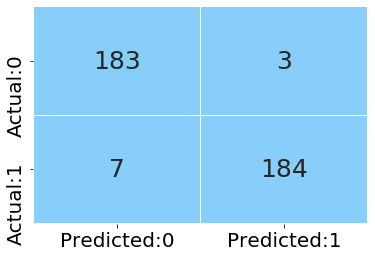

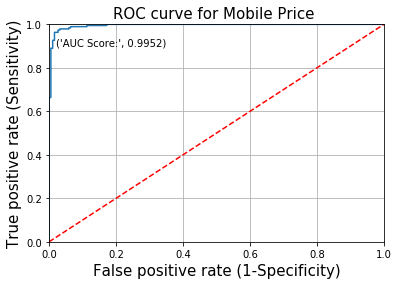

In [113]:

plot_confusion_matrix(xgb_model)

plot_roc(xgb_model)

In [115]:
xgb_model = XGBClassifier(max_depth = 2, gamma = 1,learning_rate= 0.6, n_estimators= 29)
score=cross_val_score(xgb_model, X_train, y_train, cv=10)
score=score.mean()
print("Accuracy after 10 fold cross validation:", score2)

Accuracy after 10 fold cross validation: 0.9672329329962073


## Best performing models


In [116]:
scores = [['Gaussian Naive Bayes', gnb_score],
          ['K-Nearest Neighbor', knn_score],
          ['Logistic Regression', lr_score],
          ['Decision Tree', dtc_score],
          ['Random Forest', rf_score],
         ['XGB Classifier',score],
         ['AdaBoost Classifier',score1],
         ['Gradient Boosting Classifier',score2]]
 

df_scores = pd.DataFrame(scores,
                         columns = ['Model', 'Score Average']
                        )
df_scores

,Model,Score Average
0,Gaussian Naive Bayes,0.927363
1,K-Nearest Neighbor,0.885754
2,Logistic Regression,0.992035
3,Decision Tree,0.831756
4,Random Forest,0.928216
5,XGB Classifier,0.970781
6,AdaBoost Classifier,0.969888
7,Gradient Boosting Classifier,0.967233
